In [1]:
setwd('C:/Users/bki19/OneDrive/deskto/Linear_Regression/data')

In [2]:
df<-read.csv('./Pneumoconiosis.csv')

In [3]:
colnames(df)<-c('x1','x2','x3','y')

y: 광부 중에 폐결핵 심각한 케이스의 비율<br>
x: 노출 된 시간


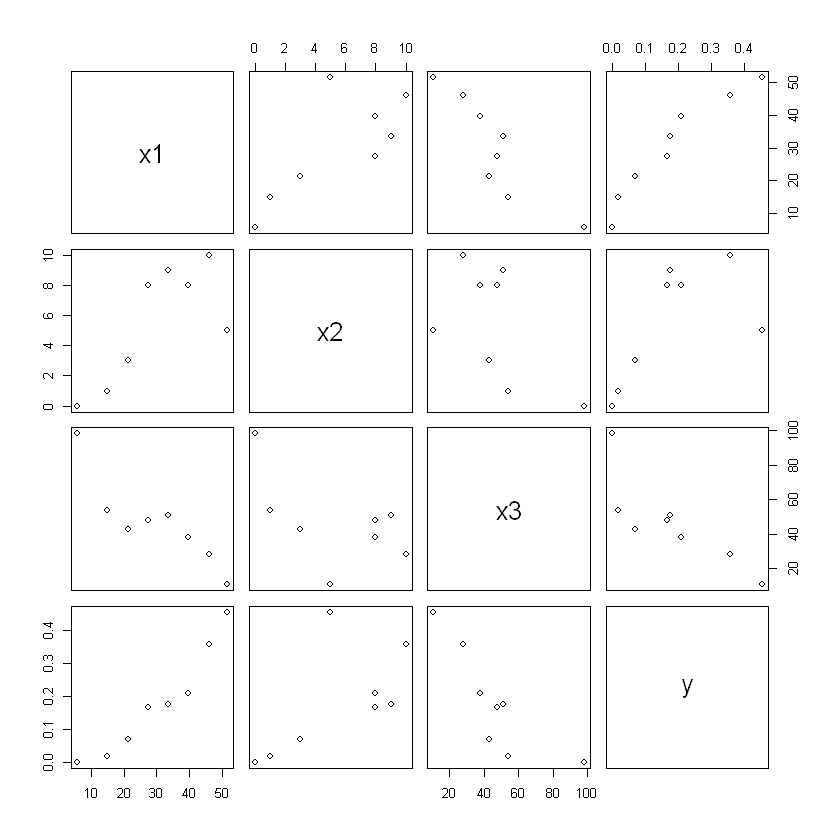

In [4]:
plot(df)

In [5]:
fit<-glm(y~x1,family=binomial(link='logit'),data=df)

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"

In [6]:
summary(fit)


Call:
glm(formula = y ~ x1, family = binomial(link = "logit"), data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.19099  -0.08502  -0.01350   0.02465   0.19211  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) -4.48626    3.65483  -1.227    0.220
x1           0.08468    0.08912   0.950    0.342

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.348836  on 7  degrees of freedom
Residual deviance: 0.095221  on 6  degrees of freedom
AIC: 7.5204

Number of Fisher Scoring iterations: 6


odds ratio: exp(beta_hat)<br>
predictor가 한 단위 증가했을 때 성공 확률의 증가 추정 

In [7]:
exp(coef(fit)[2])
exp(coef(fit)[2]*10)

x1 
1.088366

x1 
2.332123

노출된 년 수가 한 단위 증가할 때 폐결핵 심각한 케이스의 비율의 odds는 10센트 증가<br>
10년 증가시 2배 이상 증가

In [8]:
fit2<-glm(y~poly(x1,2),family=binomial(link='logit'),data=df)

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"

In [9]:
summary(fit2)


Call:
glm(formula = y ~ poly(x1, 2), family = binomial(link = "logit"), 
    data = df)

Deviance Residuals: 
        1          2          3          4          5          6          7  
-0.121315  -0.059587   0.035543   0.160785  -0.021389  -0.137092  -0.009697  
        8  
 0.052521  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)   -2.0747     1.7011  -1.220    0.223
poly(x1, 2)1   4.1407     6.0251   0.687    0.492
poly(x1, 2)2  -0.7012     4.4473  -0.158    0.875

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.348836  on 7  degrees of freedom
Residual deviance: 0.067487  on 5  degrees of freedom
AIC: 9.4904

Number of Fisher Scoring iterations: 7


In [10]:
Beta_hat1<-fit2$coefficients
exp(Beta_hat1[2])

poly(x1, 2)1 
    62.84741

In [11]:
G2<-fit2$null.deviance-fit2$deviance
G2

[1] 1.281349

In [12]:
1-pchisq(G2,1)

[1] 0.2576484

In [13]:
anova(fit2)

,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,7,1.34883632
"poly(x1, 2)",2,1.281349,5,0.06748737
